In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
plt.style.use('ggplot')
%matplotlib inline

# Functions

In [2]:
def initialize(dimensions):
  parameters = {}
  layers = len(dimensions)

  for layer in range(1, layers):
    parameters[f'W{layer}'] = np.random.randn(
        dimensions[layer], 
        dimensions[layer-1]
        )
    parameters[f'b{layer}'] = np.random.randn(dimensions[layer], 1)
  
  return parameters

In [4]:
params = initialize((2, 32, 32, 2))
for k, v in params.items():
  print(k, ' : ', v.shape)

W1  :  (32, 2)
b1  :  (32, 1)
W2  :  (32, 32)
b2  :  (32, 1)
W3  :  (2, 32)
b3  :  (2, 1)


In [5]:
def forward_propagation(X, parameters):
  activations = {'A0': X}
  layers = len(parameters) // 2

  for layer in range(1, layers+1):
    Z = parameters[f'W{layer}'].dot(activations[f'A{layer-1}']) + parameters[f'b{layer}']
    activations[f'A{layer}'] = 1 / (1 + np.exp(Z))
  
  return activations

In [6]:
def backpropagation(y, parameters, activations):
  m = y.shape[1]
  layers = len(parameters) // 2

  dZ = activations['A' + str(layers)] - y
  gradients = {}

  for layer in reversed(range(1, layers + 1)):
    gradients[f'dW{layer}'] = 1/m * np.dot(dZ, activations[f'A{layer - 1}'].T)
    gradients[f'db{layer}'] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if layer > 1:
      dZ = np.dot(parameters['W' + str(layer)].T, dZ) * activations['A' + str(layer - 1)] * (1 - activations['A' + str(layer - 1)])

  return gradients

In [7]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [8]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [10]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialize(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = backpropagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


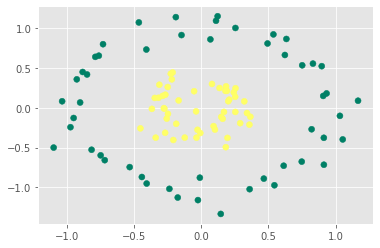

In [11]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:04<00:00, 608.17it/s]


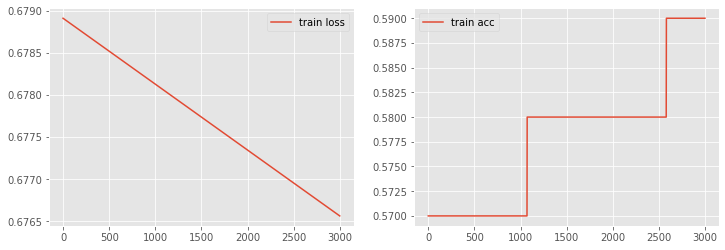

array([[0.6789104 , 0.57      ],
       [0.67890961, 0.57      ],
       [0.67890883, 0.57      ],
       ...,
       [0.67656365, 0.59      ],
       [0.67656287, 0.59      ],
       [0.67656209, 0.59      ]])

In [18]:
deep_neural_network(X, y, 
                    hidden_layers = (32, 32, 32), 
                    learning_rate = 0.0001, 
                    n_iter = 3000)